# Task - 3 - Data Visualisation with Seaborn


In [1]:
# import the libraries
import pandas as pd
import numpy as np

In [5]:
# read the dataset and check the first five rows
inp0 = pd.read_csv("Case+Study+Notebook+(Completed)/Case Study Notebook (Completed)/googleplaystore_v2.csv")
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Check the shape of the dataframe
inp0.shape

(10841, 13)

#### Data Handling and Cleaning

In [7]:
# Check the datatypes of all the columns of the dataframe

inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [8]:
# Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
# Drop the rows having null values in the Rating field
inp1 = inp0[~inp0.Rating.isnull()]

#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [10]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [11]:
# Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [12]:
# Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [13]:
# Drop the row having shifted values

inp1.loc[10472,:]
inp1[(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]
inp1 = inp1[~(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]

# Check the nulls again in Android version column to cross-verify

inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [14]:
# Check the most common value in the Android version column
inp1['Android Ver'].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [15]:
# Fill up the nulls in the Android Version column with the above value
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [16]:
# Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].isnull().sum()

0

In [17]:
# Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [18]:
# Check the most common value in the Current version column
inp1['Current Ver'].value_counts()

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [19]:
# Replace the nulls in the Current version column with the above value
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

#### Handling Incorrect Data Types


In [20]:
# Check the datatypes of all the columns 
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [21]:
# Analyse the Price column to check the issue
inp1.Price.value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: count, Length: 73, dtype: int64

In [22]:
# Write the function to make the changes
inp1.Price = inp1.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))

In [23]:
# Verify the dtype of Price once again
inp1.Price.dtype

dtype('float64')

In [24]:
# Analyse the Reviews column
inp1.Reviews.value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [25]:
# Change the dtype of this column
inp1.Reviews = inp1.Reviews.astype("int32")
#Check the quantitative spread of this dataframe
inp1.Reviews.describe()


count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [26]:
# Analyse the Installs Column
inp1.Installs.head()


0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [27]:
# Clean the Installs Column and find the approximate number of apps at the 50th percentile.
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))
type(clean_installs("3,000+"))
inp1.Installs = inp1.Installs.apply(clean_installs)
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### Sanity Checks

#### The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.

In [28]:
# Perform the sanity checks on the Reviews column
inp1[(inp1.Reviews > inp1.Installs)].shape

(7, 13)

In [29]:
inp1[(inp1.Reviews > inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [30]:
inp1 = inp1[inp1.Reviews <= inp1.Installs]

In [31]:
# perform the sanity checks on prices of free apps 
inp1[(inp1.Type == "Free") & (inp1.Price>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [34]:
# import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt  
import seaborn as sns

#### Distribution Plots

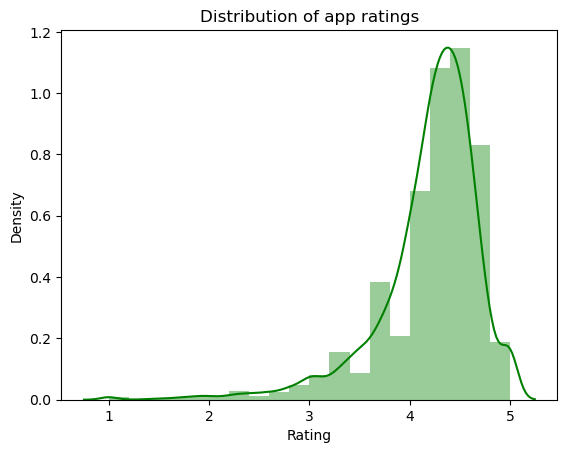

In [38]:
# Create a distribution plot for rating
sns.distplot(inp1.Rating, bins=20, color="g")
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

In [39]:
# Analyse the Content Rating column
inp1['Content Rating'].value_counts()

Content Rating
Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [40]:
# Remove the rows with values which are less represented 
inp1 = inp1[~inp1['Content Rating'].isin(["Adults only 18+","Unrated"])]

In [41]:
inp1.shape

(9355, 13)

In [42]:
# Reset the index
inp1.reset_index(inplace=True, drop=True)

In [43]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9355 non-null   object 
 1   Category        9355 non-null   object 
 2   Rating          9355 non-null   float64
 3   Reviews         9355 non-null   int32  
 4   Size            9355 non-null   float64
 5   Installs        9355 non-null   int64  
 6   Type            9355 non-null   object 
 7   Price           9355 non-null   float64
 8   Content Rating  9355 non-null   object 
 9   Genres          9355 non-null   object 
 10  Last Updated    9355 non-null   object 
 11  Current Ver     9355 non-null   object 
 12  Android Ver     9355 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 913.7+ KB


In [44]:
# Check the apps belonging to different categories of Content Rating 
inp1['Content Rating'].value_counts()

Content Rating
Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: count, dtype: int64

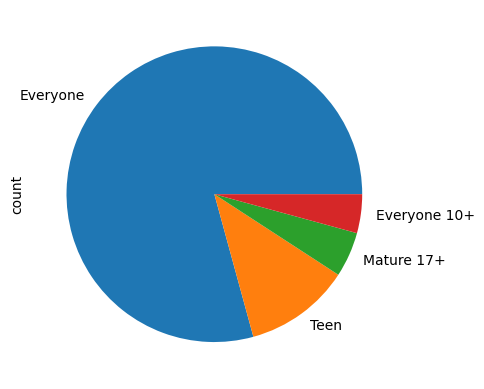

In [45]:
# Plot a pie chart
inp1['Content Rating'].value_counts().plot.pie()
plt.show()

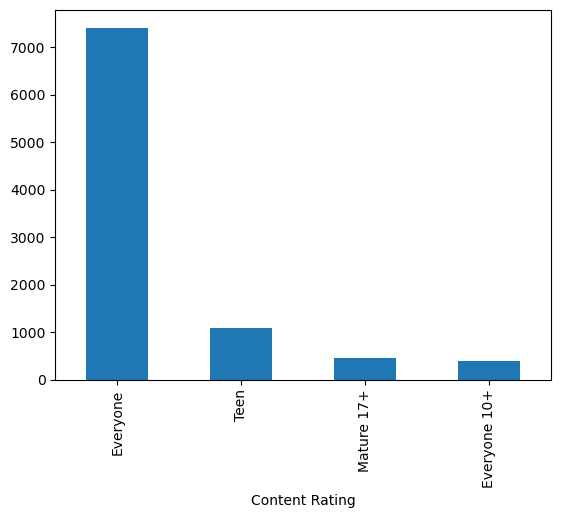

In [46]:
# Plot a bar chart
inp1['Content Rating'].value_counts().plot.bar()
plt.show()

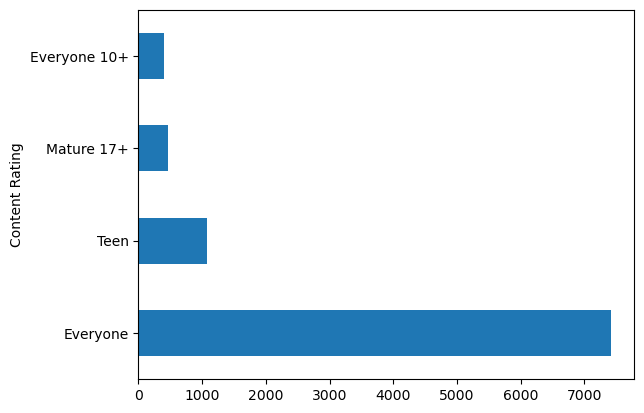

In [47]:
# Plot a bar plot for checking the 4th highest Android version type
inp1['Content Rating'].value_counts().plot.barh()
plt.show()

## Scatter Plots

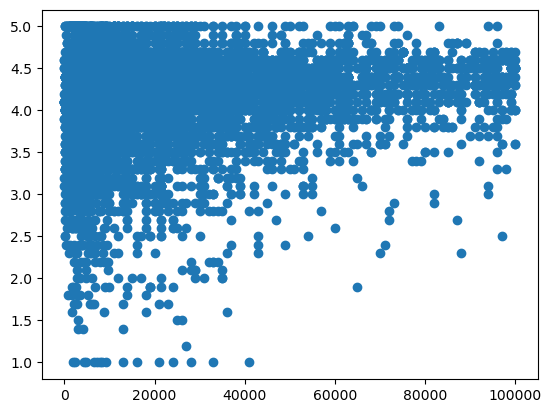

In [48]:
### Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp1.Size, inp1.Rating)
plt.show()

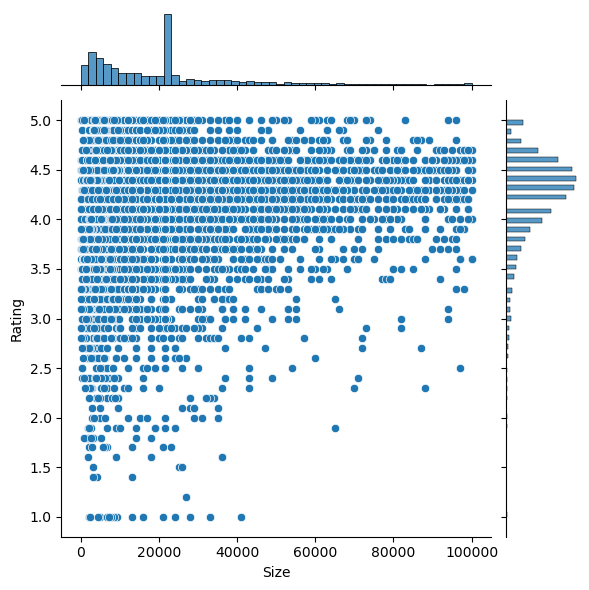

In [49]:
sns.jointplot(x = 'Size', y = 'Rating' , data = inp1)
plt.show()

### Reg Plots

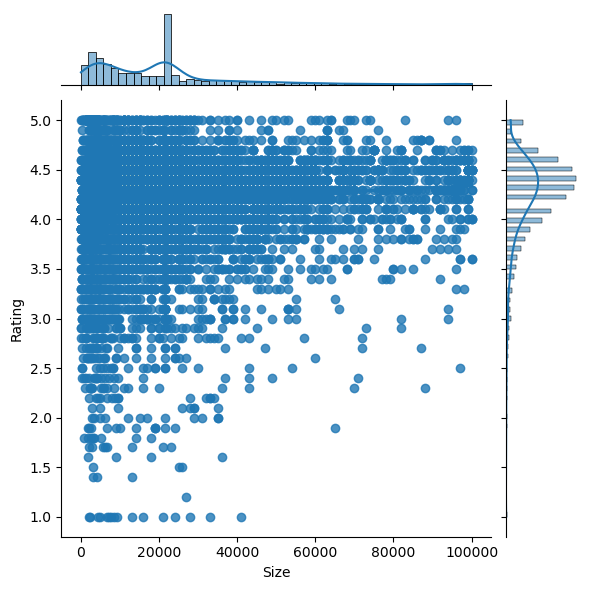

In [50]:
## Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(x = 'Size', y = 'Rating' , data = inp1 , kind = 'reg')
plt.show()

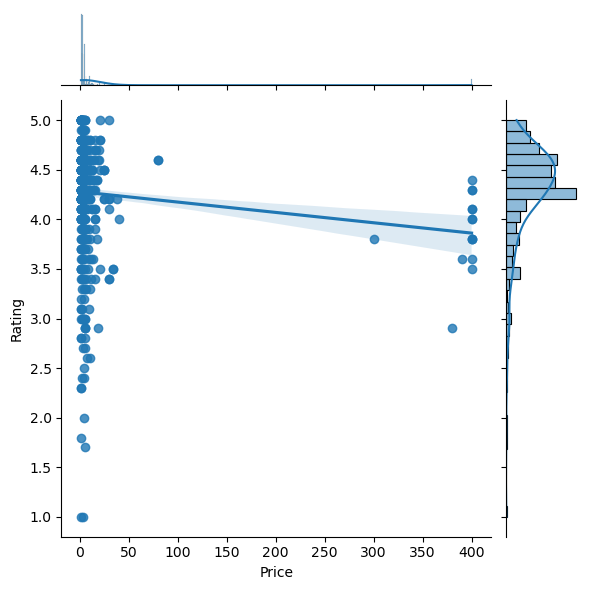

In [51]:
# Plot a reg plot for Price and Rating again for only the paid apps.
sns.jointplot(x = "Price", y = "Rating", data=inp1[inp1.Price>0], kind="reg")
plt.show()

### Pair Plots

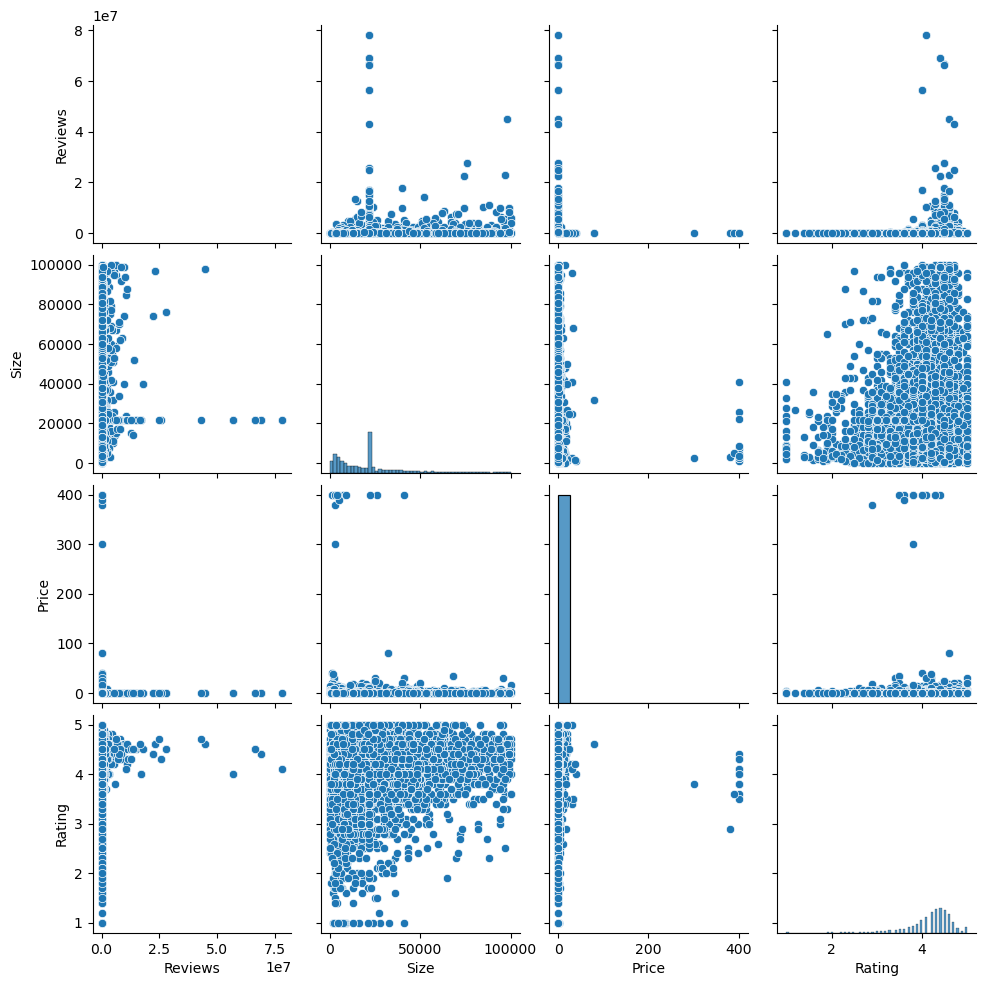

In [52]:
sns.pairplot(inp1[['Reviews', 'Size', 'Price','Rating']])
plt.show()

### Bar Charts

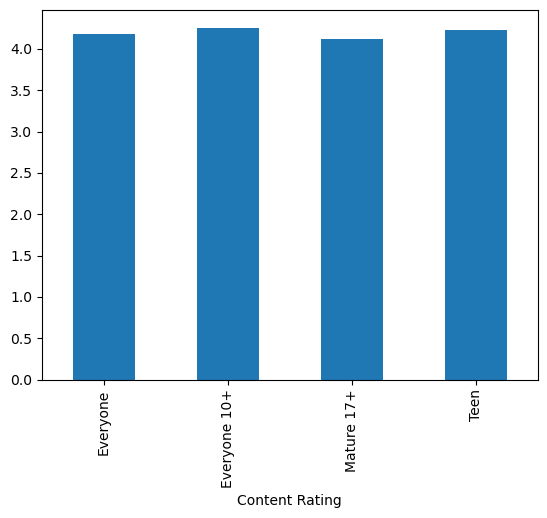

In [53]:
# Plot a bar plot of Content Rating vs Average Rating 
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()
plt.show()

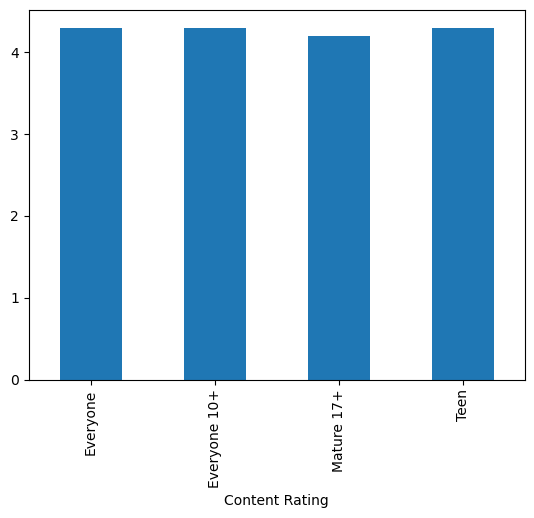

In [54]:
# Plot the bar plot again with Median Rating
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()
plt.show()

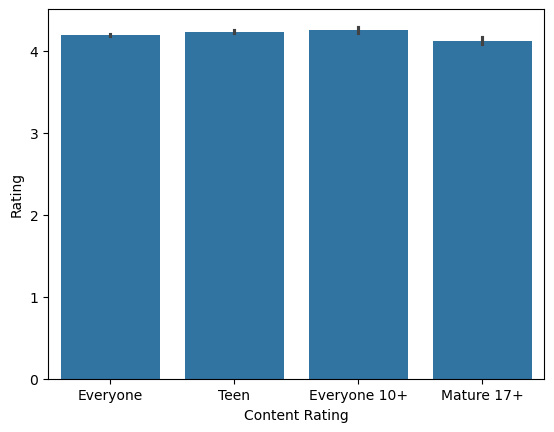

In [55]:
sns.barplot(data=inp1, x="Content Rating", y="Rating")

plt.show()

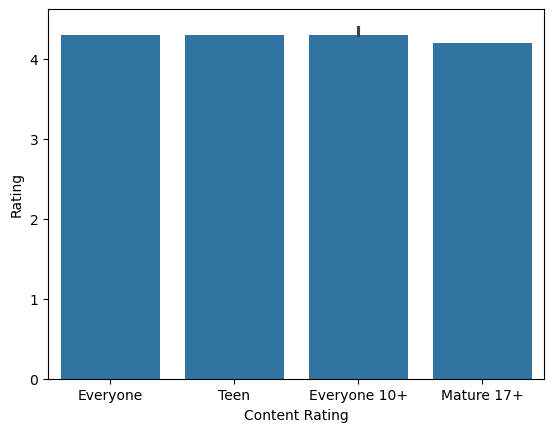

In [56]:
# Plot the above bar plot using the estimator parameter
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=np.median)
plt.show()

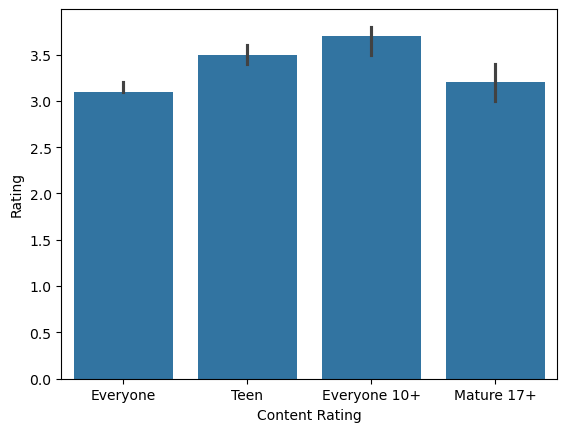

In [57]:
# Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=lambda x: np.quantile(x,0.05))
plt.show()

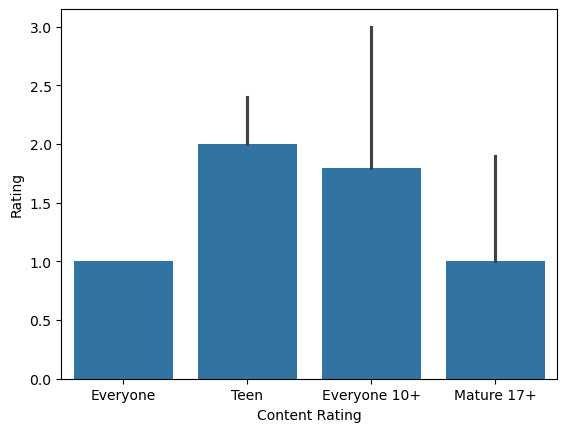

In [58]:
# Plot the bar plot with the minimum Rating
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=np.min)
plt.show()

### Box plots

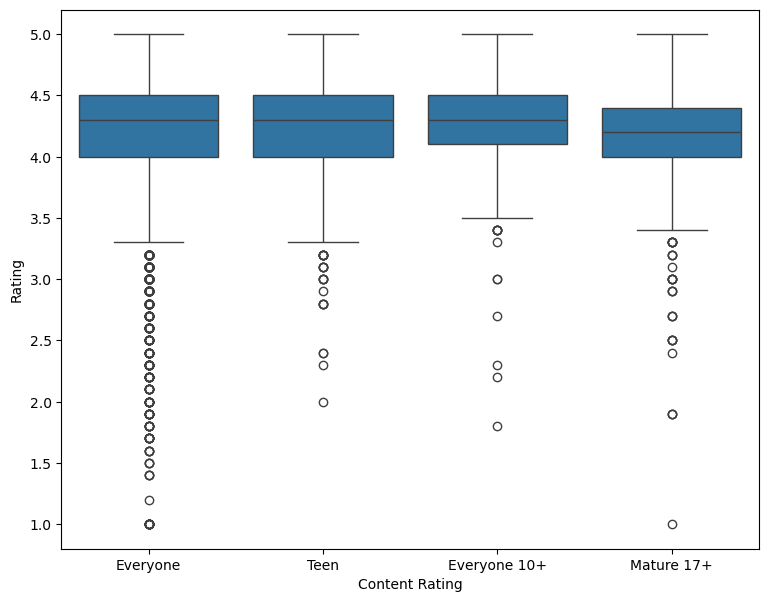

In [59]:
# Plot a box plot of Rating vs Content Rating
plt.figure(figsize=[9,7])
sns.boxplot(x = 'Content Rating', y = 'Rating' , data = inp1)
plt.show()

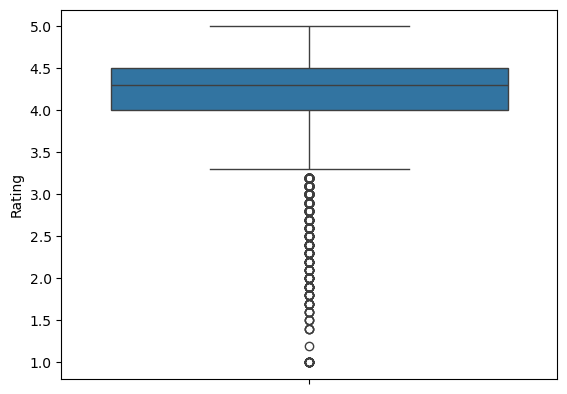

In [60]:
# Plot a box plot for the Rating column only
sns.boxplot(inp1.Rating)
plt.show()

In [61]:
# Plot a box plot of Ratings across the 4 most popular Genres
inp1['Genres'].value_counts()

Genres
Tools                      732
Entertainment              533
Education                  468
Action                     358
Productivity               351
                          ... 
Parenting;Brain Games        1
Card;Brain Games             1
Tools;Education              1
Entertainment;Education      1
Strategy;Creativity          1
Name: count, Length: 115, dtype: int64

In [62]:
c = ['Tools','Entertainment','Medical','Education']
inp5= inp1[inp1['Genres'].isin(c)]

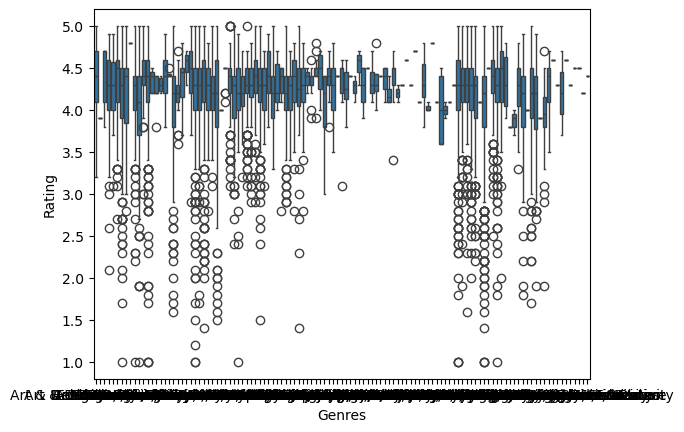

In [63]:
sns.boxplot(x = 'Genres' , y =  'Rating' , data = inp1)
plt.show()

### Heat Maps

In [64]:
# Ratings vs Size vs Content Rating

# Prepare buckets for the Size column using pd.qcut

inp1['Size_Bucket'] = pd.qcut(inp1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])

In [65]:
# Create a pivot table for Size_buckets and Content Rating with values set to Rating
inp1.head()
pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.112653,4.167516,4.254010,4.164042,4.220790
Everyone 10+,4.189474,4.251282,4.253153,4.226761,4.283439
Mature 17+,4.112281,4.057292,4.098592,4.174603,4.194175
Teen,4.198165,4.221893,4.207101,4.228462,4.276855


In [66]:
# Change the aggregation to median
pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating", aggfunc=np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.2,4.3,4.3,4.30,4.3
Everyone 10+,4.1,4.3,4.3,4.30,4.4
Mature 17+,4.3,4.2,4.2,4.20,4.2
Teen,4.3,4.3,4.3,4.25,4.3


In [67]:
# Change the aggregation to 20th percentile
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x: np.quantile(x,0.2))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.1,3.8,4.00
Everyone 10+,3.86,4.06,4.1,4.0,4.02
Mature 17+,3.42,3.60,4.0,3.9,4.00
Teen,3.80,3.90,4.0,4.0,4.00


In [68]:
# Store the pivot table in a separate variable
res = pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x: np.quantile(x,0.2))

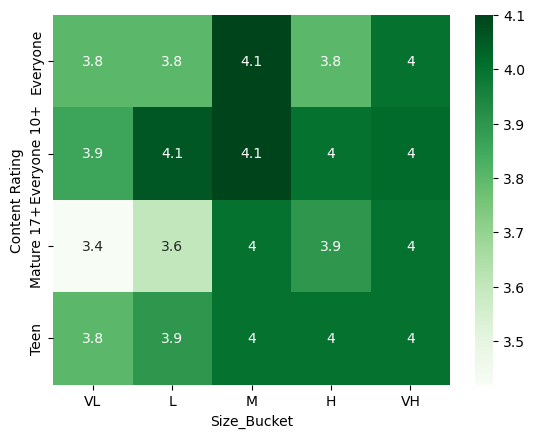

In [69]:
# Plot a heat map
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

In [70]:
# Replace Content Rating with Review_buckets in the above heat map
# Keep the aggregation at minimum value for Rating
inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
dtype: object

### Additional Visualisations
### Line Plots

In [71]:
# Extract the month from the Last Updated Date
inp1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [72]:
inp1['updated_month'] = pd.to_datetime(inp1['Last Updated']).dt.month

In [73]:
# Find the average Rating across all the months
inp1.groupby(['updated_month'])['Rating'].mean()

updated_month
1     4.142892
2     4.094048
3     4.110766
4     4.154600
5     4.161031
6     4.184372
7     4.249206
8     4.292963
9     4.042636
10    4.016460
11    4.112298
12    4.071006
Name: Rating, dtype: float64

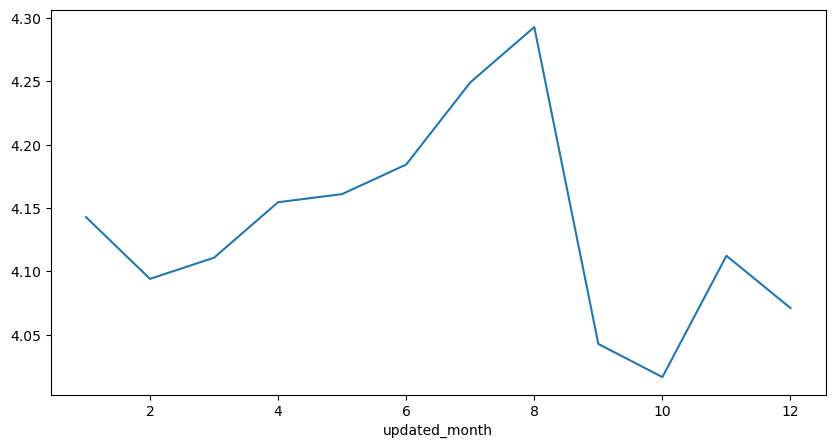

In [74]:
# Plot a line graph
plt.figure(figsize=[10,5])
inp1.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()

### Stacked Bar Charts


In [75]:
# Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=inp1, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,1025487390,105282000,9701210,44159010
2,945372005,19821000,13021500,39597710
3,1045380520,30322510,9111100,99850310
4,2593371280,23300000,5259000,271619410
5,5431097800,128173500,110140100,562689600
6,6157183505,1367727100,155257200,505716600
7,46991121780,9726556000,1739491910,15983556800
8,46490943320,1715821000,3462981700,16997855650
9,410340410,24931100,2201010,22483100


In [76]:
# Store the table in a separate variable
monthly = pd.pivot_table(data=inp1, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)

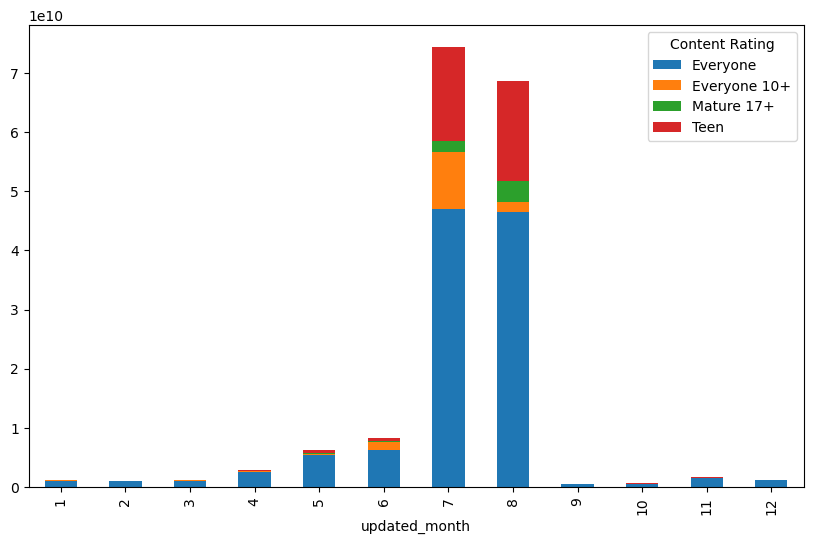

In [77]:
# Plot the stacked bar chart.
monthly.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

In [78]:
# Plot the stacked bar chart again wrt to the proportions.
monthly_perc = monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(), axis=1)

In [ ]:
monthly_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()